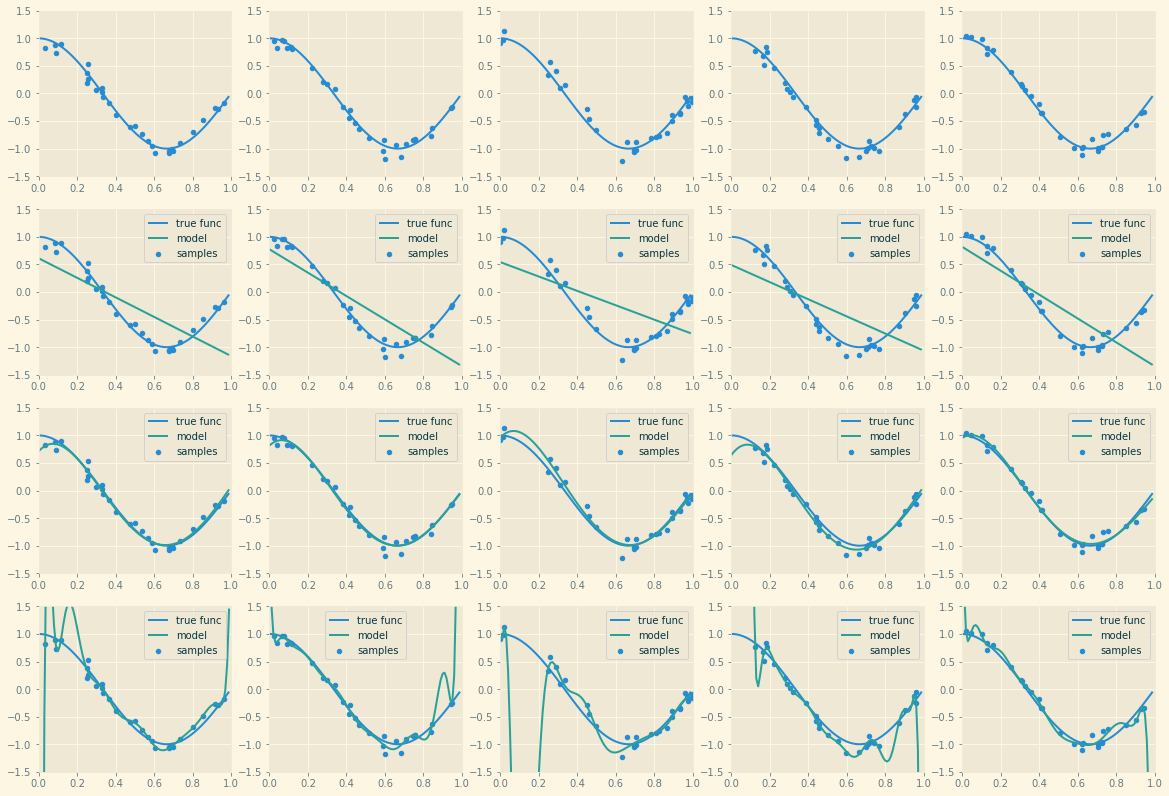

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures


def true_fun(X):
    return np.cos(1.5 * np.pi * X)


trial = 5
n_samples = 30
degrees = [1, 4, 15]
X_test = np.arange(0, 1, 0.01)

with plt.style.context('Solarize_Light2'):
    plt.figure(figsize=(20, 14))

    for t in range(trial):

        X = np.sort(np.random.rand(n_samples))
        y = true_fun(X) + np.random.randn(n_samples) * 0.1
        ax = plt.subplot(len(degrees)+1, trial, t + 1)
        plt.plot(X_test, true_fun(X_test), label="true func")
        plt.scatter(X, y, s=20, label="samples")
        plt.xlim((0, 1))
        plt.ylim((-1.5, 1.5))

        for i in range(len(degrees)):
            ax = plt.subplot(len(degrees)+1, trial, (i+1)*trial + t+1)

            polynomial_features = PolynomialFeatures(degree=degrees[i], include_bias=False)
            linear_regression = LinearRegression()
            pipeline = Pipeline(
                [
                    ("polynomial_features", polynomial_features),
                    ("linear_regression", linear_regression),
                ]
            )
            pipeline.fit(X[:, np.newaxis], y)
            plt.plot(X_test, true_fun(X_test), label="true func")
            plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="model")
            plt.scatter(X, y, s=20, label="samples")
            plt.xlim((0, 1))
            plt.ylim((-1.5, 1.5))
            plt.legend(loc="best", labelcolor='#073642')

    plt.show()
